(2562, 250, 250, 3) (2562,)
(2049, 250, 250, 3) (513, 250, 250, 3) (2049,) (513,)
Epoch 1/15
65/65 [==============================] - 277s 4s/step - loss: 3.5817 - accuracy: 0.0673 - val_loss: 5.1430 - val_accuracy: 0.0390
Epoch 2/15
65/65 [==============================] - 224s 3s/step - loss: 2.8123 - accuracy: 0.2138 - val_loss: 3.3077 - val_accuracy: 0.1287
Epoch 3/15
65/65 [==============================] - 249s 4s/step - loss: 2.3624 - accuracy: 0.3123 - val_loss: 3.2126 - val_accuracy: 0.1618
Epoch 4/15
65/65 [==============================] - 242s 4s/step - loss: 2.0145 - accuracy: 0.3997 - val_loss: 2.8583 - val_accuracy: 0.1891
Epoch 5/15
65/65 [==============================] - 237s 4s/step - loss: 1.6399 - accuracy: 0.5183 - val_loss: 2.7903 - val_accuracy: 0.2437
Epoch 6/15
65/65 [==============================] - 219s 3s/step - loss: 1.4184 - accuracy: 0.5695 - val_loss: 3.1180 - val_accuracy: 0.2281
Epoch 7/15
65/65 [==============================] - 232s 4s/step - loss:

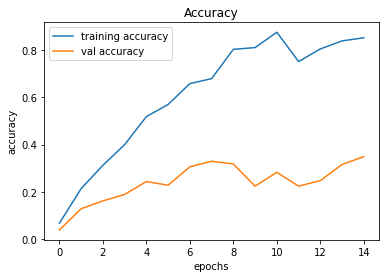

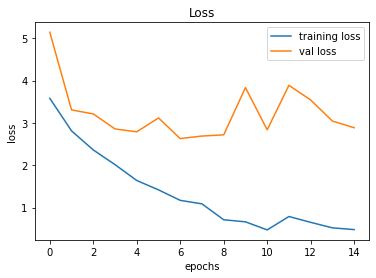

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import BatchNormalization

data = []
labels = []
classes = 31


for i in range(classes):
    path = os.path.join("C:\\Users\\Dushyanth v\\Desktop\\Face Detection\\Images",str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((250,250))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


y_train = to_categorical(y_train, 31)
y_test = to_categorical(y_test, 31)


model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(250,250,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(31,activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


from sklearn.metrics import accuracy_score
pred = np.argmax(X_test)